<h2>Different Loss Functions<h2>

<h2>READ TENSORS<h2>

In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import pickle
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import nn
import itertools
import torch.nn.functional as F

from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

In [2]:
# temperature_tensor = torch.load('temperature_tensor.pt')
# height_tensor = torch.load('height_tensor.pt')

temperature_tensor = torch.load('temperature_tensor_v1.pt')
height_tensor = torch.load('height_tensor_v1.pt')

In [6]:
temperatures = temperature_tensor.numpy()
heights = height_tensor.numpy()

t = []
for temperature in temperatures:
    t.append([temperature[0]])
t = np.array(t)
t_tensor = torch.from_numpy(t).float()
    
h = []
for height in heights:
    h.append([height[0]])
h = np.array(h)
h_tensor = torch.from_numpy(h).float()

<h3>CNN with L1 Loss Function<h3>

In [7]:
num_epochs = 20
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.ReLU())
        # self.layer2 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer3 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        # out = self.layer2(out)
        # out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [8]:
model = ConvNet() 
criterion = nn.L1Loss(size_average=None, reduce=None, reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [10]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:00<00:13,  1.37it/s]

80.2279


 10%|████████▎                                                                          | 2/20 [00:01<00:11,  1.54it/s]

61.00675


 15%|████████████▍                                                                      | 3/20 [00:01<00:10,  1.64it/s]

52.125797


 20%|████████████████▌                                                                  | 4/20 [00:02<00:09,  1.68it/s]

58.407845


 25%|████████████████████▊                                                              | 5/20 [00:03<00:08,  1.70it/s]

61.363274


 30%|████████████████████████▉                                                          | 6/20 [00:03<00:08,  1.57it/s]

57.92531


 35%|█████████████████████████████                                                      | 7/20 [00:04<00:08,  1.49it/s]

53.734406


 40%|█████████████████████████████████▏                                                 | 8/20 [00:05<00:07,  1.55it/s]

51.53652


 45%|█████████████████████████████████████▎                                             | 9/20 [00:05<00:07,  1.57it/s]

52.498924


 50%|█████████████████████████████████████████                                         | 10/20 [00:06<00:07,  1.42it/s]

54.84856


 55%|█████████████████████████████████████████████                                     | 11/20 [00:07<00:07,  1.28it/s]

55.138275


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:08<00:05,  1.37it/s]

53.650333


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:08<00:04,  1.44it/s]

51.430485


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:09<00:03,  1.51it/s]

51.073696


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:10<00:03,  1.46it/s]

51.732338


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:10<00:03,  1.33it/s]

52.54503


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:11<00:02,  1.41it/s]

52.932175


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:12<00:01,  1.49it/s]

52.66886


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:12<00:00,  1.55it/s]

51.955738


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.50it/s]

51.199867


In [11]:
print(losses)

[array(80.2279, dtype=float32), array(61.00675, dtype=float32), array(52.125797, dtype=float32), array(58.407845, dtype=float32), array(61.363274, dtype=float32), array(57.92531, dtype=float32), array(53.734406, dtype=float32), array(51.53652, dtype=float32), array(52.498924, dtype=float32), array(54.84856, dtype=float32), array(55.138275, dtype=float32), array(53.650333, dtype=float32), array(51.430485, dtype=float32), array(51.073696, dtype=float32), array(51.732338, dtype=float32), array(52.54503, dtype=float32), array(52.932175, dtype=float32), array(52.66886, dtype=float32), array(51.955738, dtype=float32), array(51.199867, dtype=float32)]


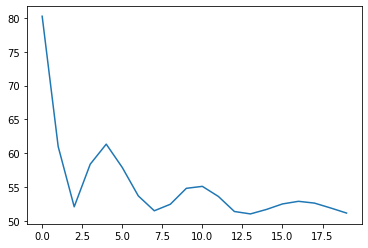

In [12]:
plt.plot(losses)
plt.show()

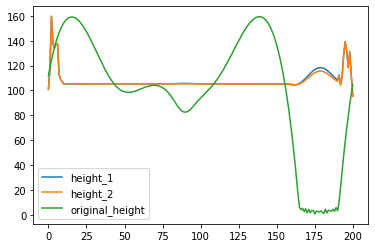

In [13]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

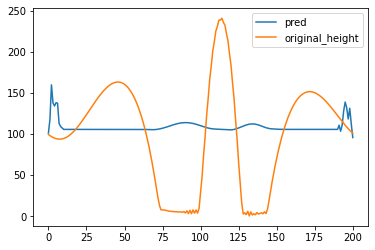

In [14]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

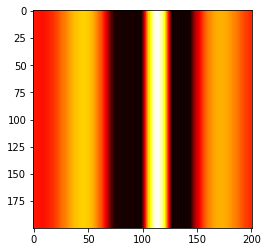

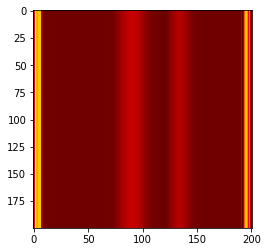

In [15]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h3>MLP with L1 Loss<h3>

In [16]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [17]:
model = MLP() 
criterion = nn.L1Loss(size_average=None, reduce=None, reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [19]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    #Backprop and perform Adam optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

 40%|█████████████████████████████████▏                                                 | 8/20 [00:00<00:00, 40.85it/s]

87.85049
82.0281
79.114136
76.59287
74.38165
72.68743
71.461105
70.85004
70.37946


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:00<00:00, 45.05it/s]

69.88838
69.322075
68.88213
68.46737
68.11433
67.84843
67.54164
67.25693
67.05413
66.88047


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 43.93it/s]

66.65096


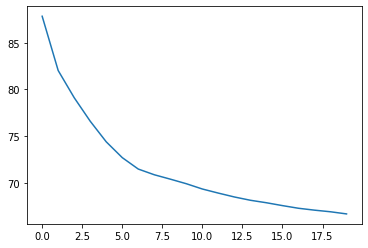

In [20]:
plt.plot(losses)
plt.show()

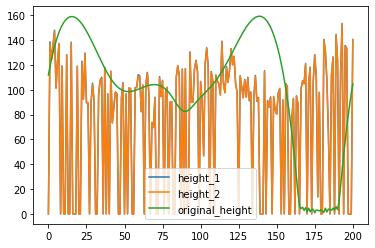

In [21]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

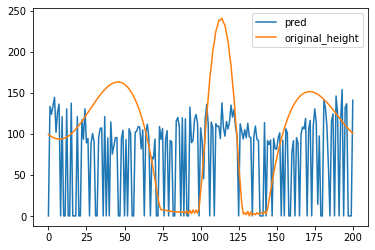

In [22]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

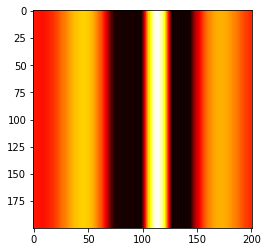

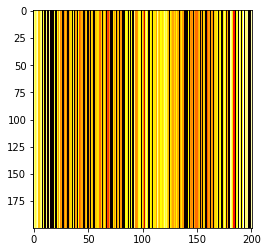

In [23]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h3>CNN with SL1 Loss<h3>

In [41]:
num_epochs = 20
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.ReLU())
        # self.layer2 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer3 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        # out = self.layer2(out)
        # out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [42]:
model = ConvNet() 
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [43]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [44]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:00<00:12,  1.58it/s]

71.34313


 10%|████████▎                                                                          | 2/20 [00:01<00:11,  1.61it/s]

52.916855


 15%|████████████▍                                                                      | 3/20 [00:01<00:10,  1.65it/s]

59.80689


 20%|████████████████▌                                                                  | 4/20 [00:02<00:11,  1.34it/s]

58.76572


 25%|████████████████████▊                                                              | 5/20 [00:03<00:10,  1.43it/s]

53.866608


 30%|████████████████████████▉                                                          | 6/20 [00:03<00:09,  1.52it/s]

52.529594


 35%|█████████████████████████████                                                      | 7/20 [00:04<00:08,  1.56it/s]

56.358955


 40%|█████████████████████████████████▏                                                 | 8/20 [00:05<00:07,  1.61it/s]

56.677616


 45%|█████████████████████████████████████▎                                             | 9/20 [00:05<00:06,  1.64it/s]

53.56269


 50%|█████████████████████████████████████████                                         | 10/20 [00:06<00:05,  1.70it/s]

51.91511


 55%|█████████████████████████████████████████████                                     | 11/20 [00:06<00:05,  1.74it/s]

53.045555


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:07<00:04,  1.72it/s]

54.348015


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:08<00:04,  1.73it/s]

54.268482


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:08<00:03,  1.70it/s]

52.950413


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:09<00:02,  1.68it/s]

51.578518


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:09<00:02,  1.70it/s]

51.10661


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:10<00:01,  1.57it/s]

52.24119


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:11<00:01,  1.41it/s]

52.509506


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:12<00:00,  1.33it/s]

51.14689


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.55it/s]

50.62331


In [45]:
print(losses)

[array(71.34313, dtype=float32), array(52.916855, dtype=float32), array(59.80689, dtype=float32), array(58.76572, dtype=float32), array(53.866608, dtype=float32), array(52.529594, dtype=float32), array(56.358955, dtype=float32), array(56.677616, dtype=float32), array(53.56269, dtype=float32), array(51.91511, dtype=float32), array(53.045555, dtype=float32), array(54.348015, dtype=float32), array(54.268482, dtype=float32), array(52.950413, dtype=float32), array(51.578518, dtype=float32), array(51.10661, dtype=float32), array(52.24119, dtype=float32), array(52.509506, dtype=float32), array(51.14689, dtype=float32), array(50.62331, dtype=float32)]


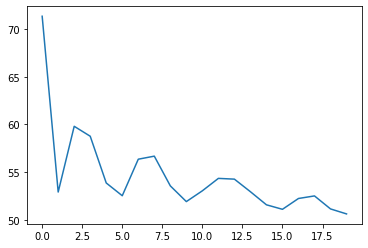

In [46]:
plt.plot(losses)
plt.show()

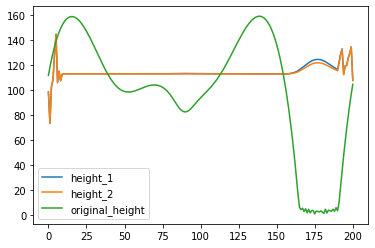

In [47]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

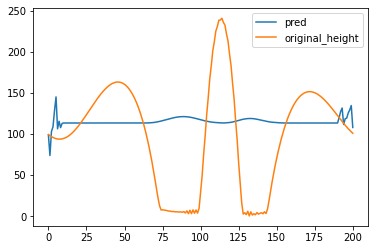

In [48]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

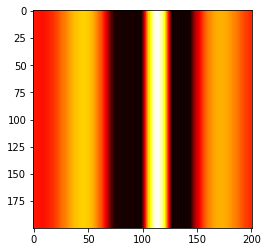

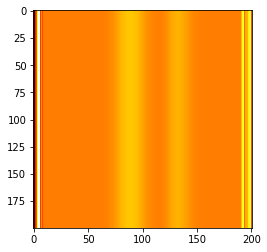

In [49]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h3>MLP with SL1 Loss<h3>

In [50]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [51]:
model = MLP() 
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [52]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [53]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    #Backprop and perform Adam optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

 45%|█████████████████████████████████████▎                                             | 9/20 [00:00<00:00, 44.16it/s]

85.755745
78.25081
75.02194
73.12546
71.55832
70.683685
70.33239
70.19944
70.05488


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:00<00:00, 46.57it/s]

69.69783
69.21239
68.899345
68.720474
68.49129
68.2242
67.98251
67.762115
67.53652
67.39581
67.2843


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.11it/s]


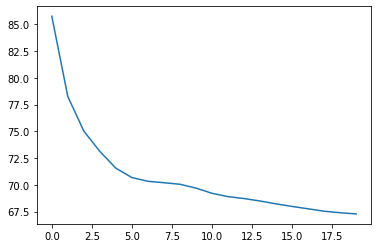

In [54]:
plt.plot(losses)
plt.show()

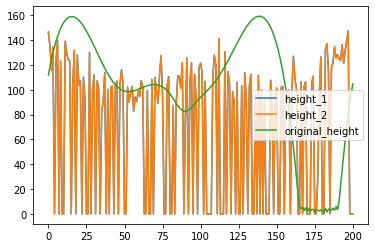

In [55]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

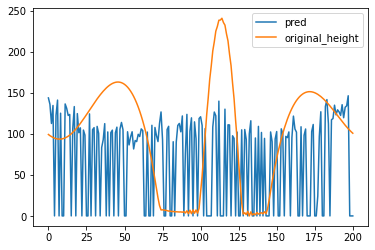

In [56]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

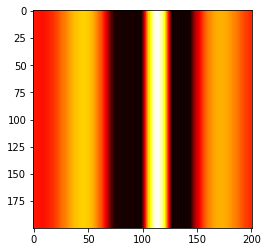

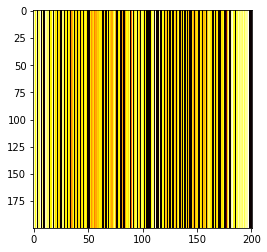

In [57]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h3>CNN with Hinge Embedding Loss<h3>

In [58]:
num_epochs = 20
learning_rate = 0.001

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 60, kernel_size=11, stride=1, padding=5),
            nn.ReLU())
        # self.layer2 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        # self.layer3 = nn.Sequential(
        #     nn.Conv1d(60, 60, kernel_size=11, stride=1, padding=1),
        #     nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv1d(60, 1, kernel_size=11, stride=1, padding=5),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        # out = self.layer2(out)
        # out = self.layer3(out)
        out = self.layer4(out)
        return out  

In [59]:
model = ConvNet() 
criterion = nn.HingeEmbeddingLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [60]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [61]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  5%|████▏                                                                              | 1/20 [00:00<00:12,  1.56it/s]

1.2742459


 10%|████████▎                                                                          | 2/20 [00:01<00:10,  1.64it/s]

0.99984765


 15%|████████████▍                                                                      | 3/20 [00:01<00:10,  1.67it/s]

0.99984765


 20%|████████████████▌                                                                  | 4/20 [00:02<00:09,  1.62it/s]

0.99984765


 25%|████████████████████▊                                                              | 5/20 [00:03<00:09,  1.65it/s]

0.99984765


 30%|████████████████████████▉                                                          | 6/20 [00:03<00:08,  1.67it/s]

0.99984765


 35%|█████████████████████████████                                                      | 7/20 [00:04<00:07,  1.67it/s]

0.99984765


 40%|█████████████████████████████████▏                                                 | 8/20 [00:04<00:07,  1.64it/s]

0.99984765


 45%|█████████████████████████████████████▎                                             | 9/20 [00:05<00:06,  1.65it/s]

0.99984765


 50%|█████████████████████████████████████████                                         | 10/20 [00:06<00:06,  1.66it/s]

0.99984765


 55%|█████████████████████████████████████████████                                     | 11/20 [00:06<00:05,  1.67it/s]

0.99984765


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:07<00:04,  1.67it/s]

0.99984765


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:07<00:04,  1.68it/s]

0.99984765


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:08<00:03,  1.68it/s]

0.99984765


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:09<00:02,  1.69it/s]

0.99984765


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:09<00:02,  1.69it/s]

0.99984765


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:10<00:01,  1.66it/s]

0.99984765


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:10<00:01,  1.69it/s]

0.99984765


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:11<00:00,  1.68it/s]

0.99984765


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.67it/s]

0.99984765


In [62]:
print(losses)

[array(1.2742459, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32), array(0.99984765, dtype=float32)]


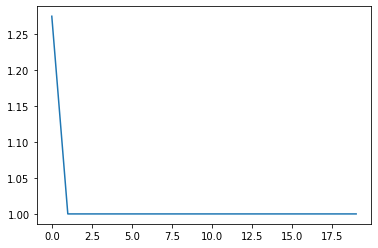

In [63]:
plt.plot(losses)
plt.show()

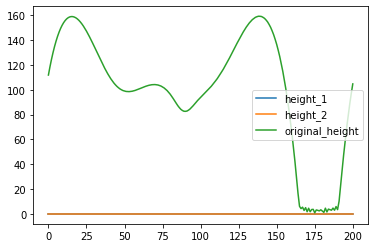

In [64]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

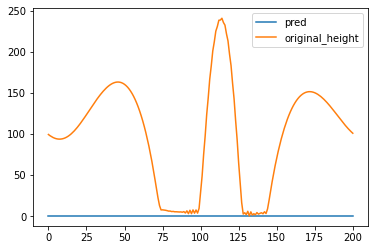

In [65]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

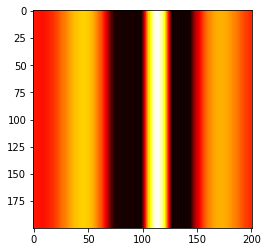

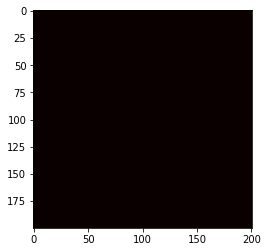

In [66]:
h_orig = np.tile(h[0], (200, 1))
h_pred = np.tile(output_1[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()

<h3>MLP with Hinge Embedding Loss<h3>

In [67]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(201, 201),
            nn.ReLU())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer4(out)
        return out  

In [68]:
model = MLP() 
criterion = nn.HingeEmbeddingLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [69]:
print(t_tensor.squeeze())

tensor([[300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        ...,
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.],
        [300., 300., 300.,  ..., 300., 300., 300.]])


In [70]:
losses = []

for epoch in tqdm(range(num_epochs)):
    outputs = model(t_tensor)
    loss = criterion(outputs, h_tensor)
    
    #Backprop and perform Adam optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss.data.numpy())

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

30.98523
14.119256


 15%|████████████▍                                                                      | 3/20 [00:00<00:00, 26.28it/s]

6.661332
3.910787
2.3305802


 30%|████████████████████████▉                                                          | 6/20 [00:00<00:00, 26.45it/s]

1.7843611
1.3740453
1.2167524


 45%|█████████████████████████████████████▎                                             | 9/20 [00:00<00:00, 27.94it/s]

1.0880115
1.0344697
1.0059713
1.0175807


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:00<00:00, 29.70it/s]

1.0039696
0.99994445
0.9999275


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:00<00:00, 29.75it/s]

0.9999665
0.9998494
0.99984765
0.99984765


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 29.52it/s]

0.99986285


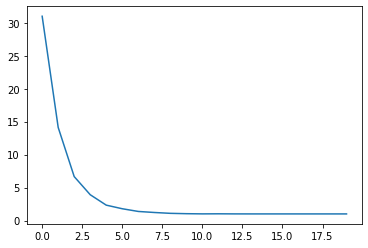

In [71]:
plt.plot(losses)
plt.show()

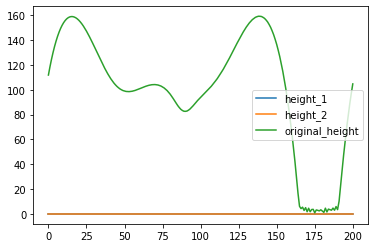

In [72]:
temp = 200

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'height_1')

output_2 = model(t_tensor[250])
output_2 = output_2.detach().numpy()
plt.plot(output_2[0], label = 'height_2')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

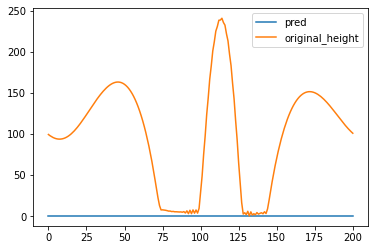

In [73]:
temp = 400

output_1 = model(t_tensor[temp])
output_1 = output_1.detach().numpy()
plt.plot(output_1[0], label = 'pred')
# plt.show()

h = h_tensor[temp].numpy()
plt.plot(h[0], label = 'original_height')
plt.legend()
plt.show()

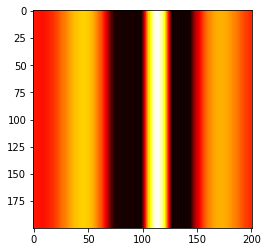

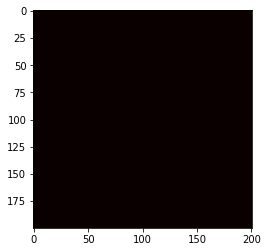

In [74]:
h_pred = np.tile(output_1[0], (200, 1))
h_orig = np.tile(h[0], (200, 1))

plt.imshow(h_orig, cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(h_pred, cmap='hot', interpolation='nearest')
plt.show()